v_mean = 4.61
v_mean_th = 5.00
v_mean_th_eff = 5.00


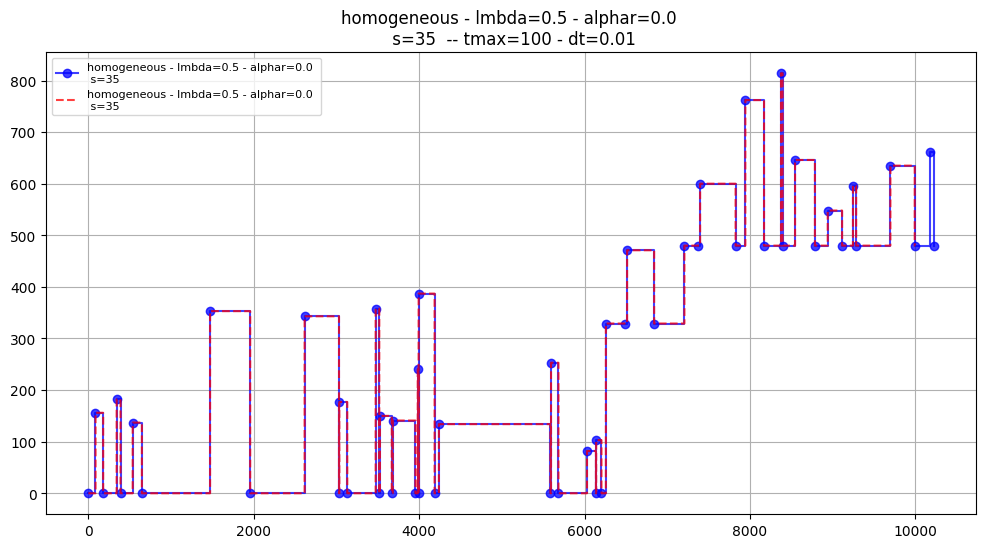

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.75
v_mean_th = 5.00
v_mean_th_eff = 5.00


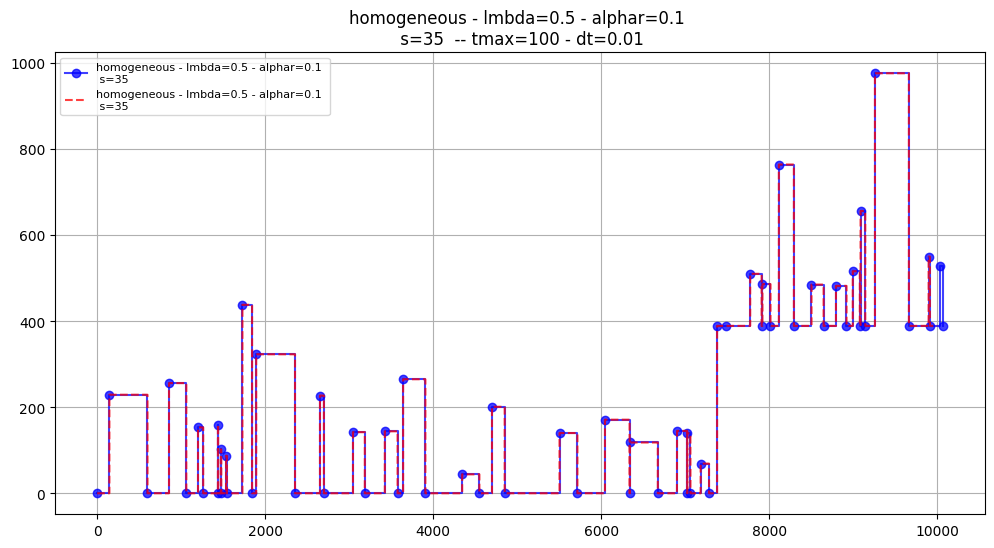

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.05
v_mean_th = 5.00
v_mean_th_eff = 5.00


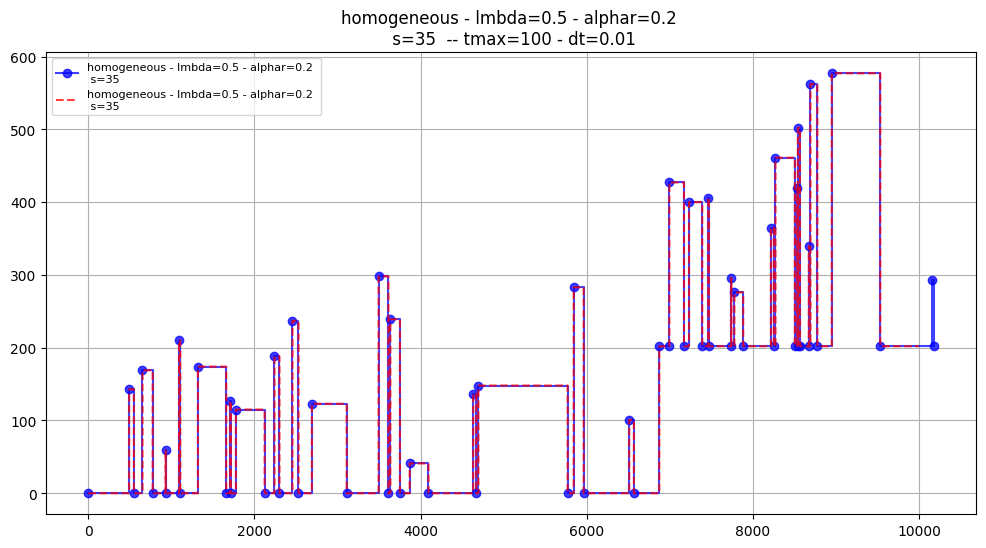

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.41
v_mean_th = 5.00
v_mean_th_eff = 5.00


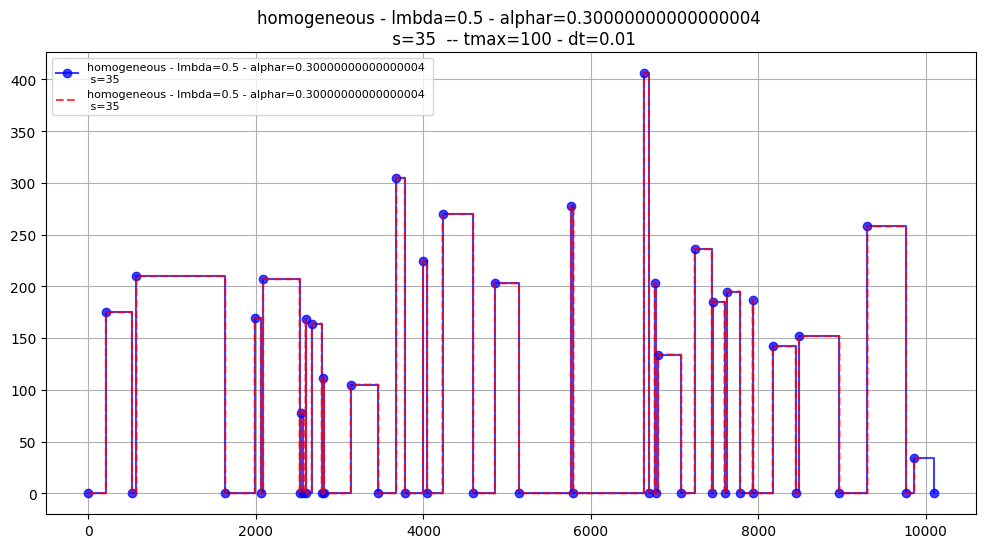

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.89
v_mean_th = 5.00
v_mean_th_eff = 5.00


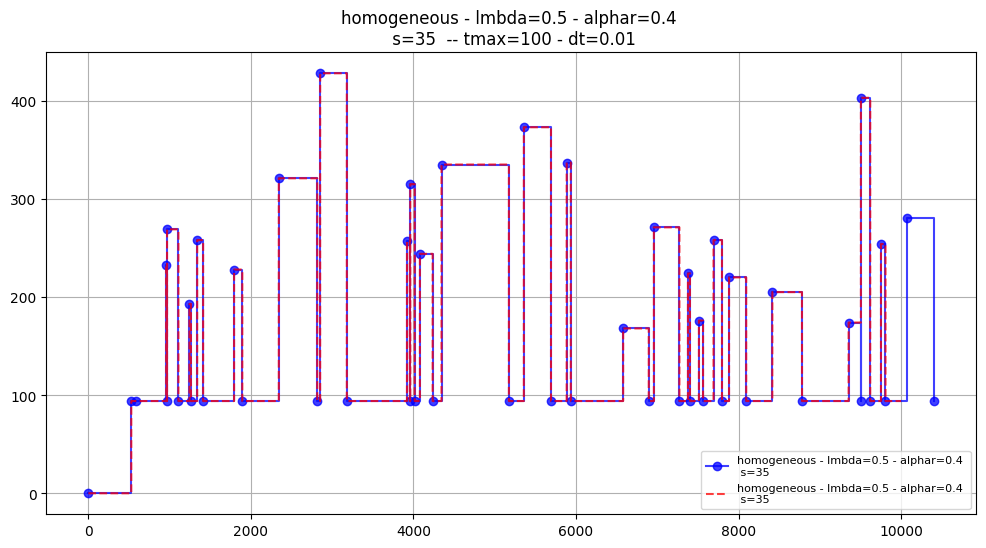

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.93
v_mean_th = 5.00
v_mean_th_eff = 5.00


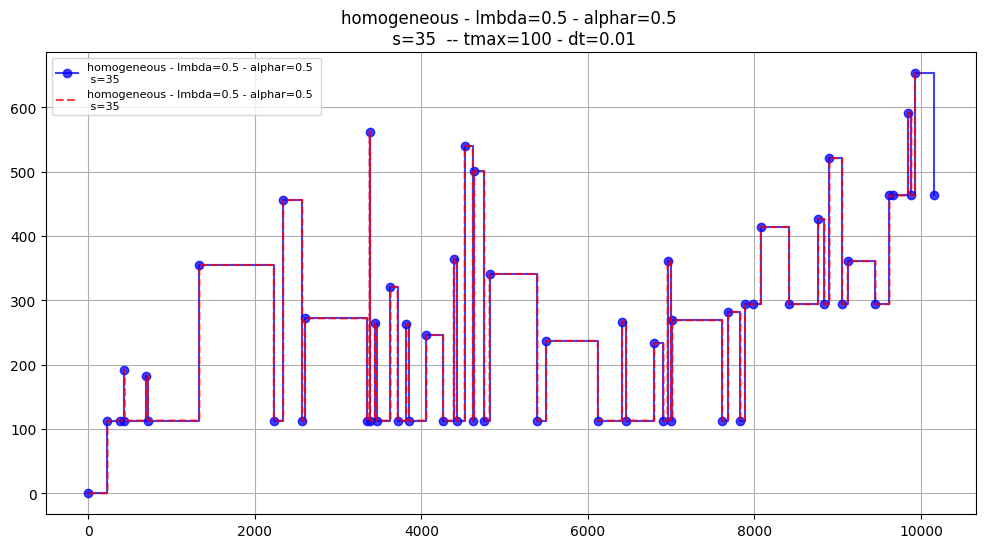

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.16
v_mean_th = 5.00
v_mean_th_eff = 5.00


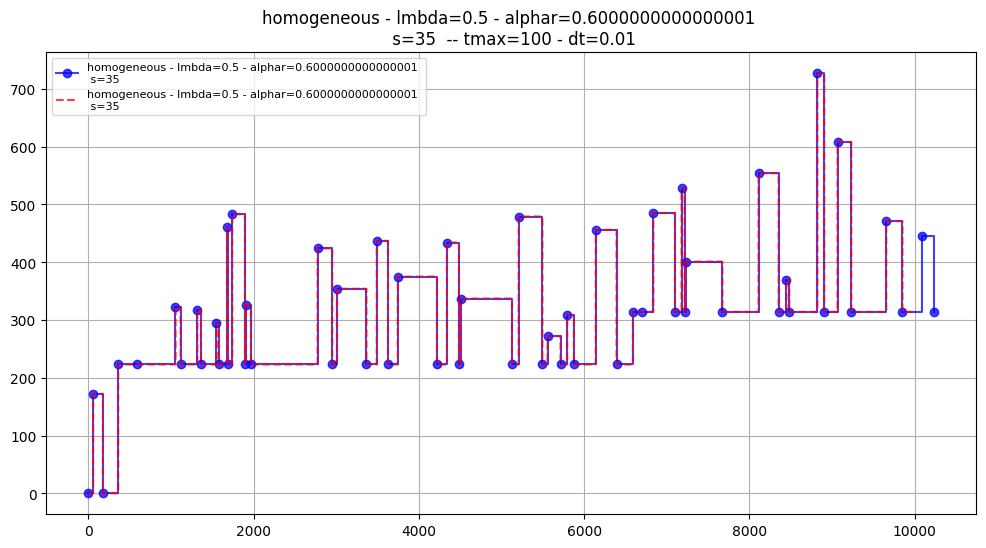

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.93
v_mean_th = 5.00
v_mean_th_eff = 5.00


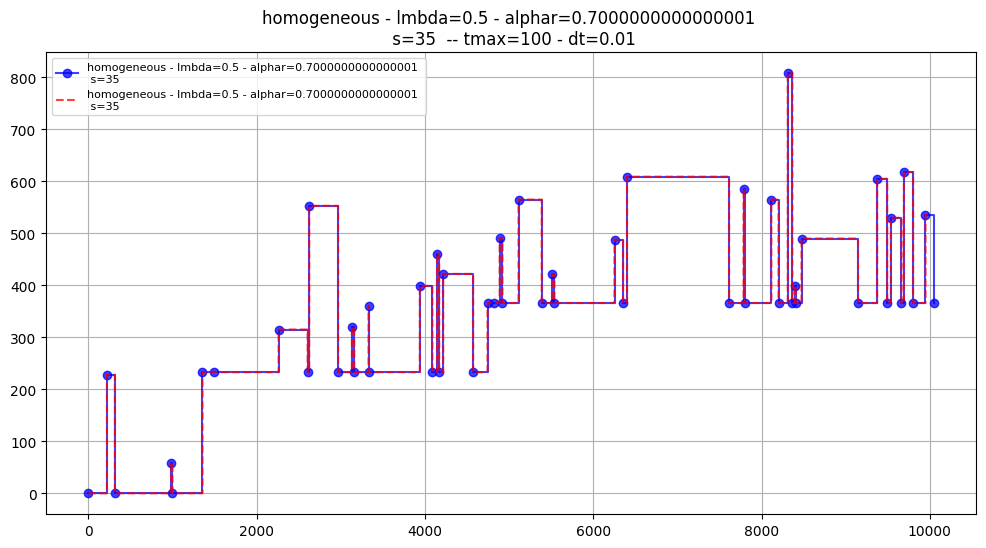

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.57
v_mean_th = 5.00
v_mean_th_eff = 5.00


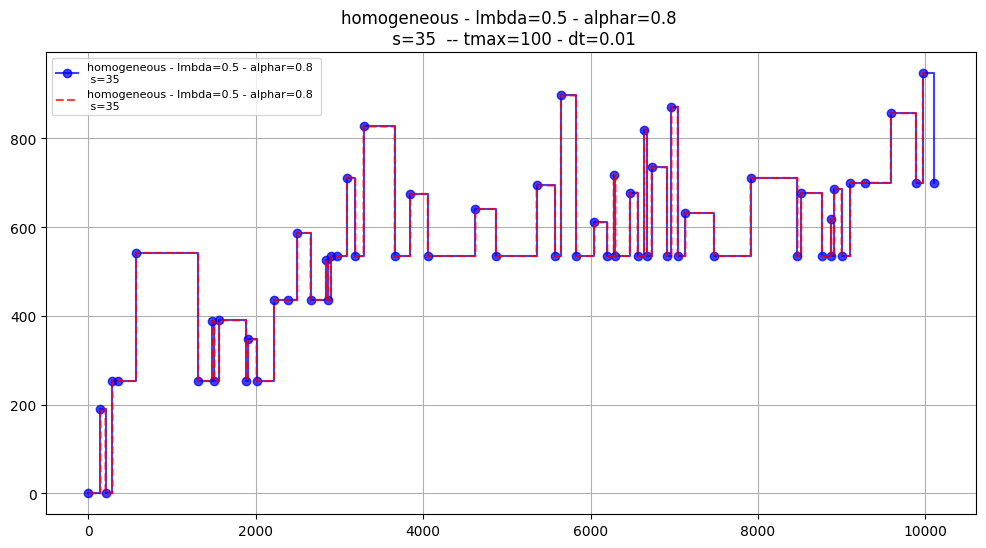

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.13
v_mean_th = 5.00
v_mean_th_eff = 5.00


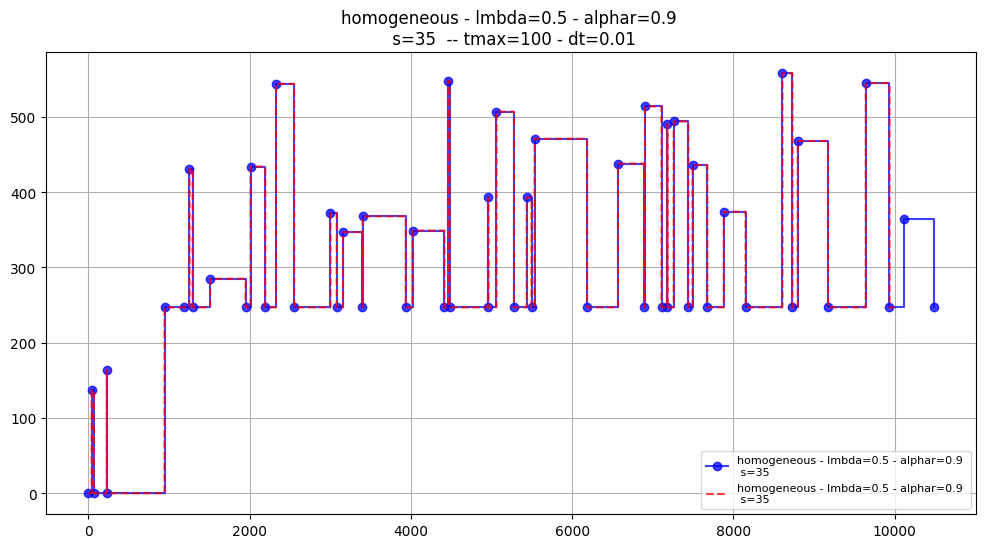

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.83
v_mean_th = 5.00
v_mean_th_eff = 5.00


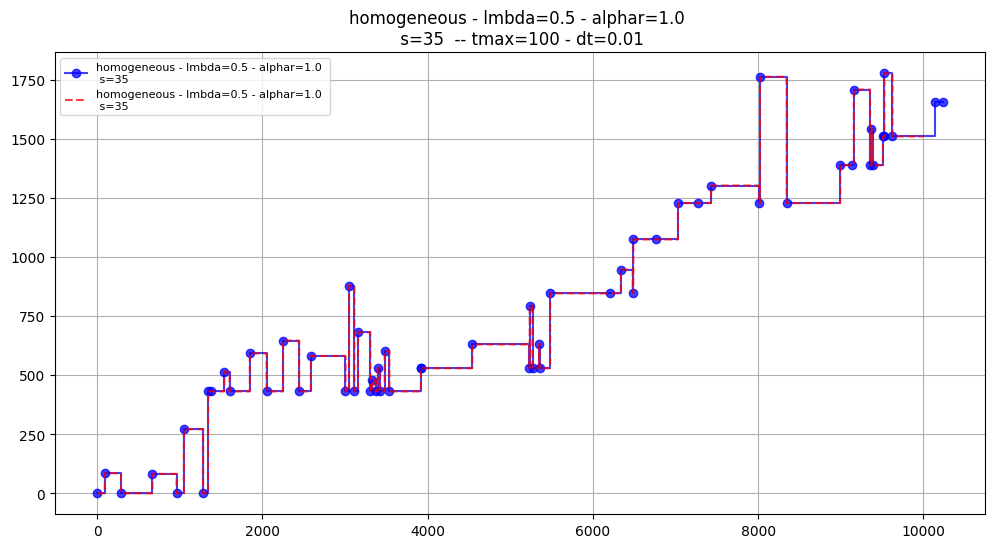

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.32
v_mean_th = 5.00
v_mean_th_eff = 5.00


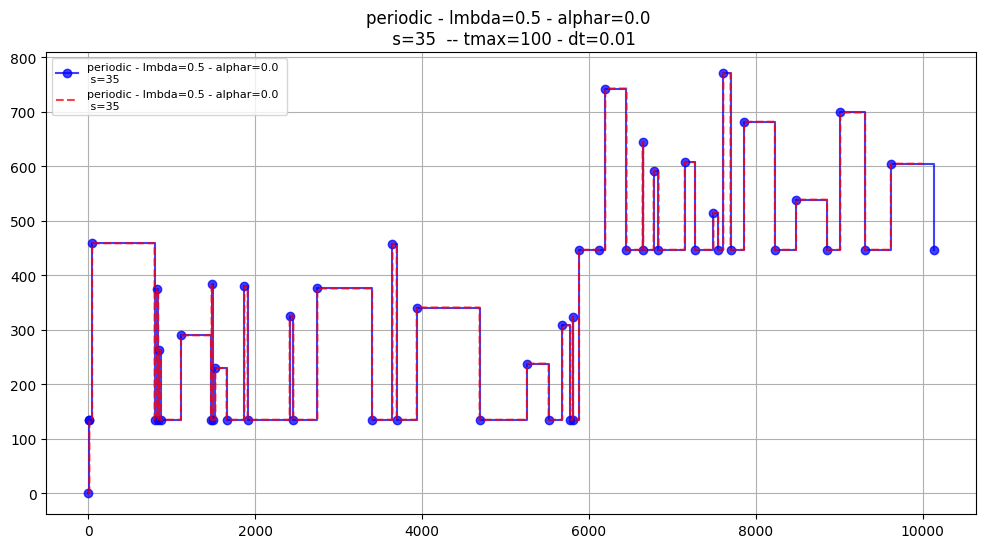

--------------------------------------------------------------------------------------------------------------------------
v_mean = 6.92
v_mean_th = 5.00
v_mean_th_eff = 5.00


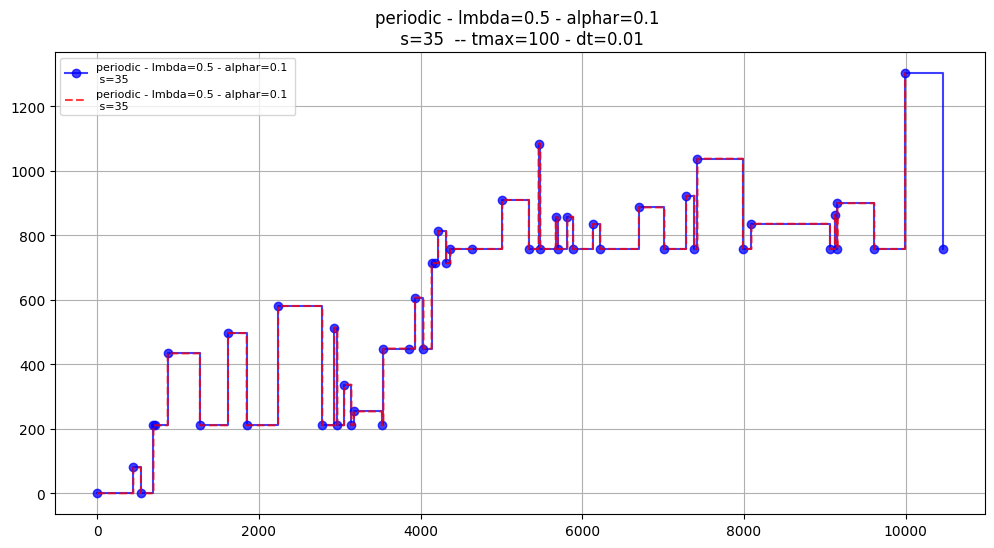

--------------------------------------------------------------------------------------------------------------------------
v_mean = 7.23
v_mean_th = 5.00
v_mean_th_eff = 5.00


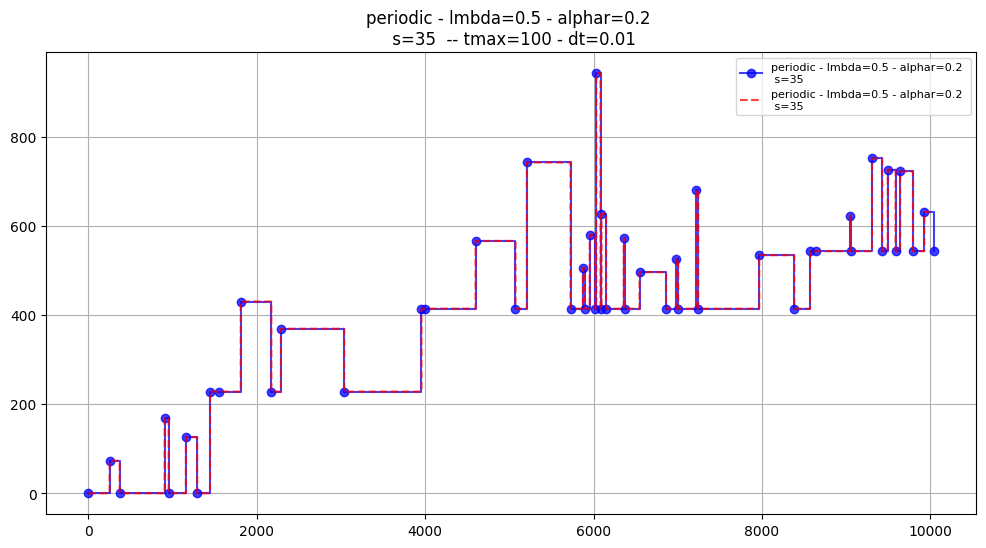

--------------------------------------------------------------------------------------------------------------------------
v_mean = 8.66
v_mean_th = 5.00
v_mean_th_eff = 5.00


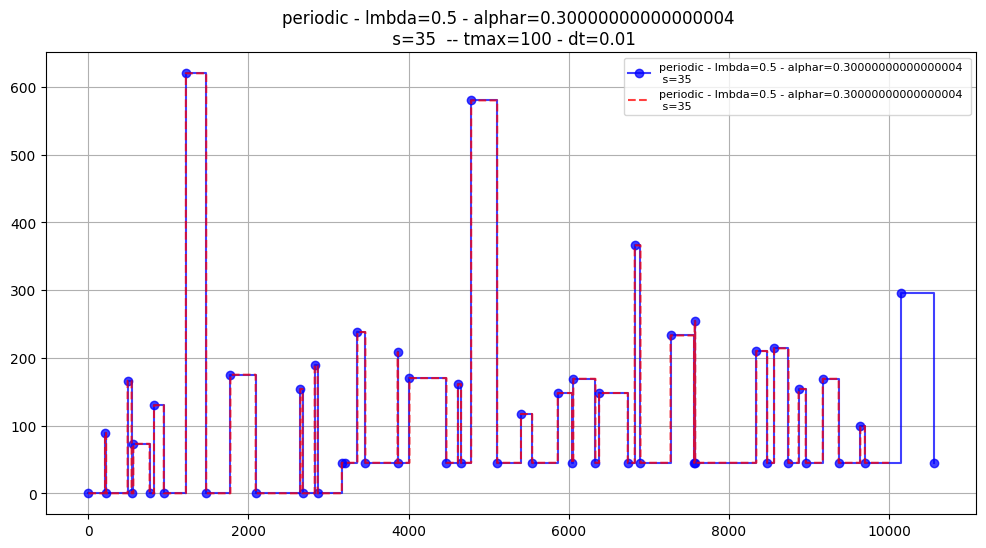

--------------------------------------------------------------------------------------------------------------------------
v_mean = 9.43
v_mean_th = 5.00
v_mean_th_eff = 5.00


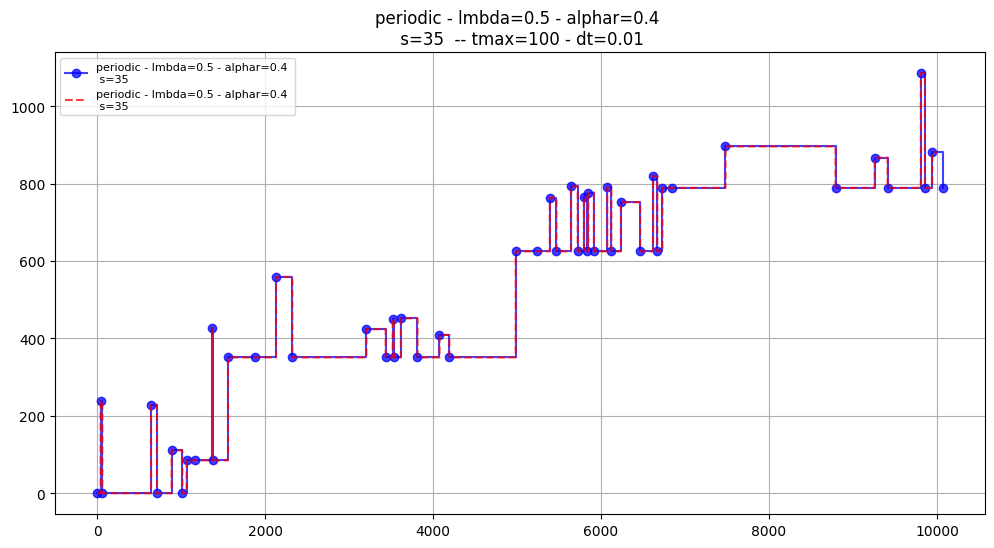

--------------------------------------------------------------------------------------------------------------------------
v_mean = 9.26
v_mean_th = 5.00
v_mean_th_eff = 5.00


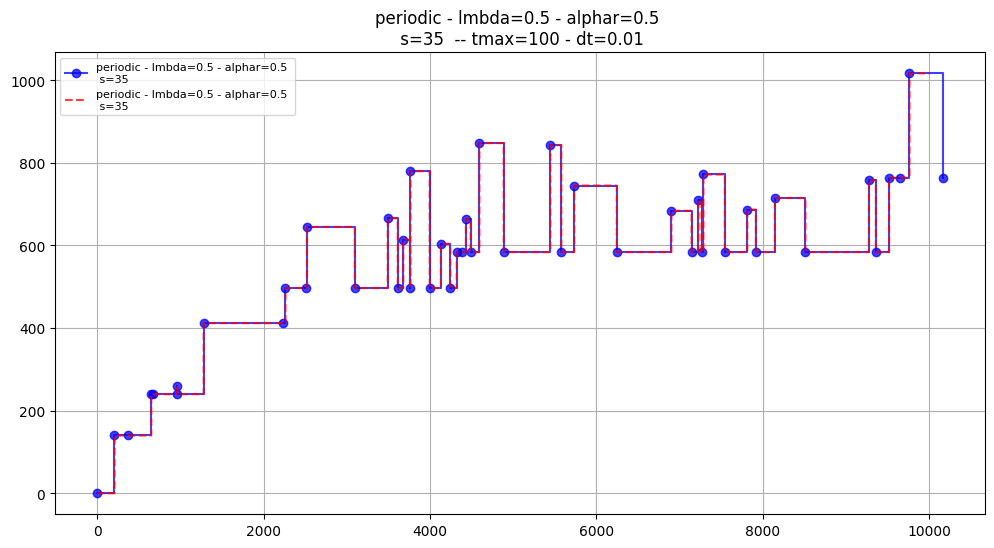

--------------------------------------------------------------------------------------------------------------------------
v_mean = 11.12
v_mean_th = 5.00
v_mean_th_eff = 5.00


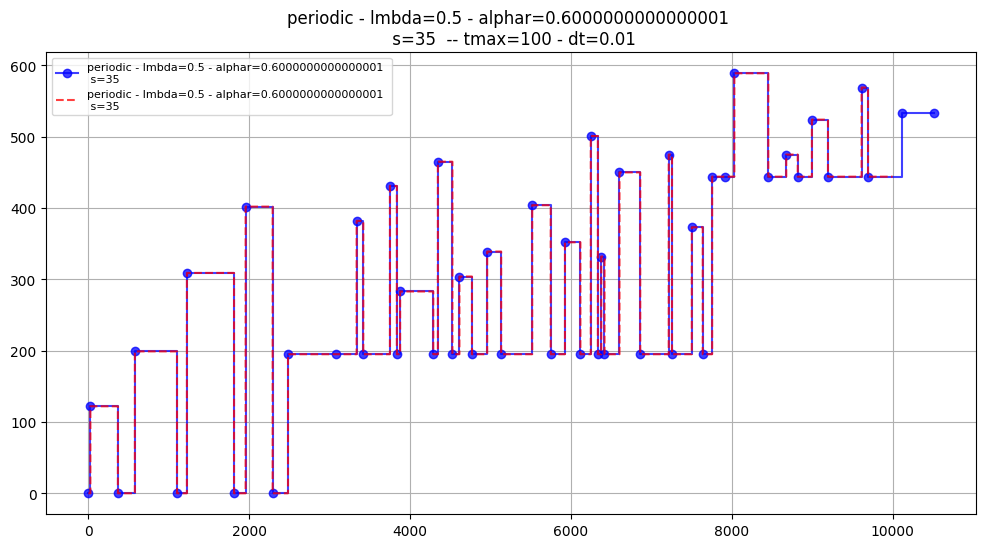

--------------------------------------------------------------------------------------------------------------------------
v_mean = 12.12
v_mean_th = 5.00
v_mean_th_eff = 5.00


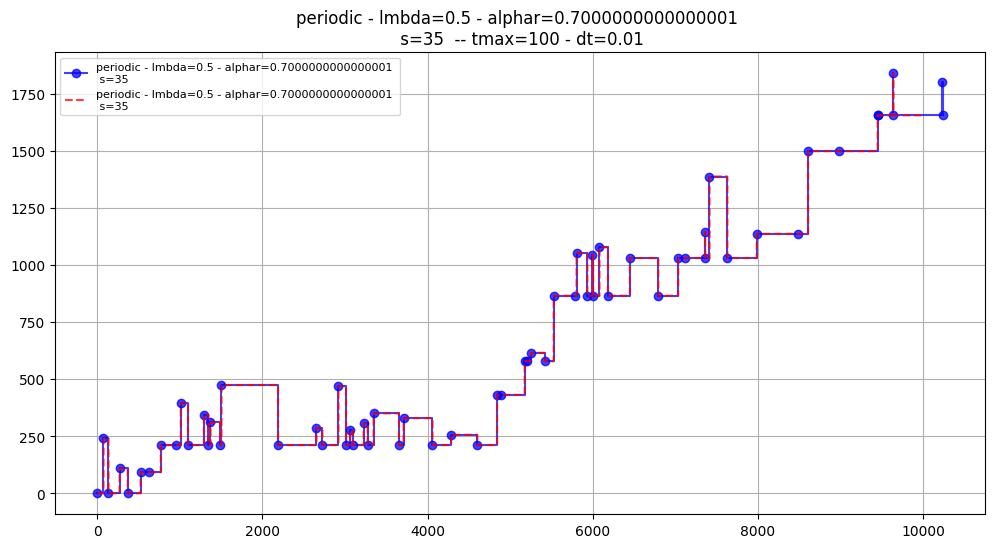

--------------------------------------------------------------------------------------------------------------------------
v_mean = 12.28
v_mean_th = 5.00
v_mean_th_eff = 5.00


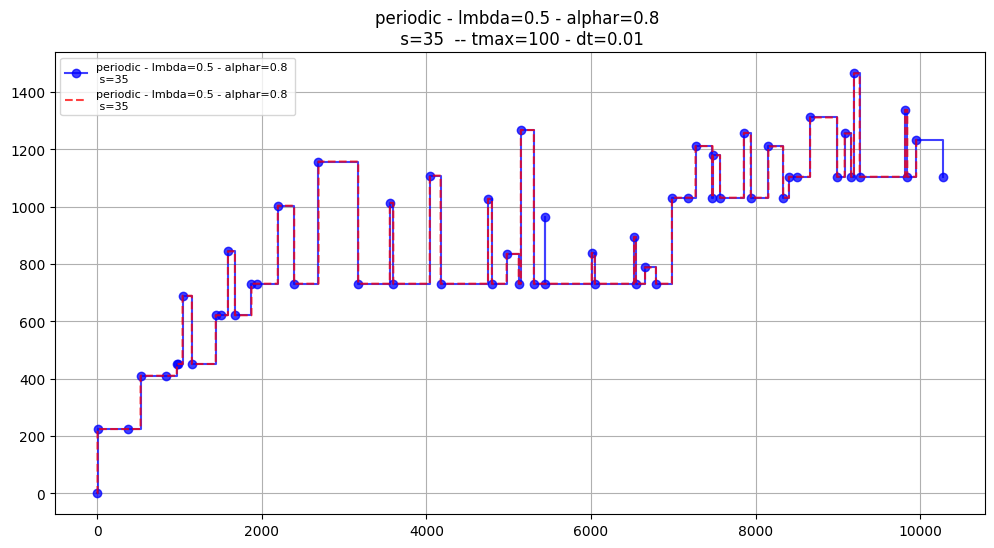

--------------------------------------------------------------------------------------------------------------------------
v_mean = 14.67
v_mean_th = 5.00
v_mean_th_eff = 5.00


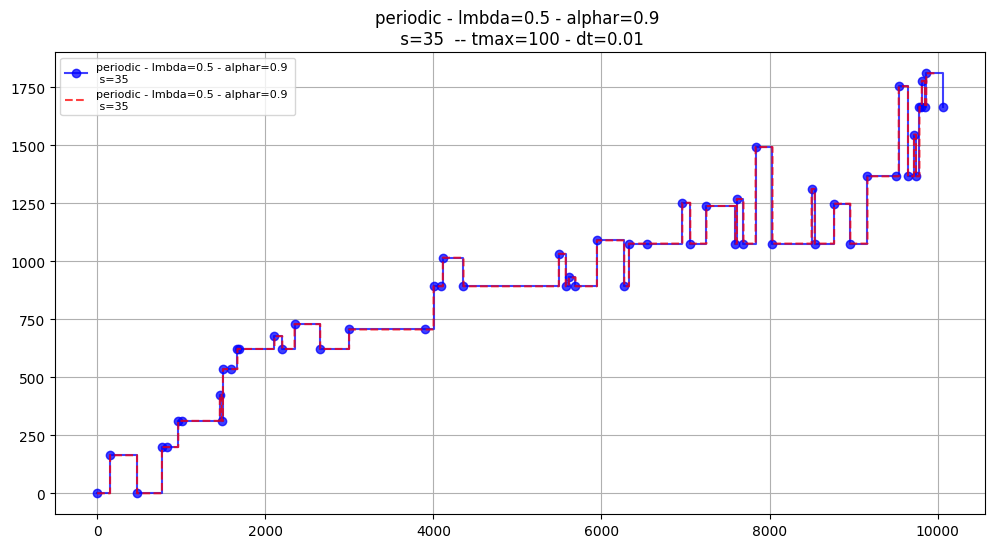

--------------------------------------------------------------------------------------------------------------------------
v_mean = 13.78
v_mean_th = 5.00
v_mean_th_eff = 5.00


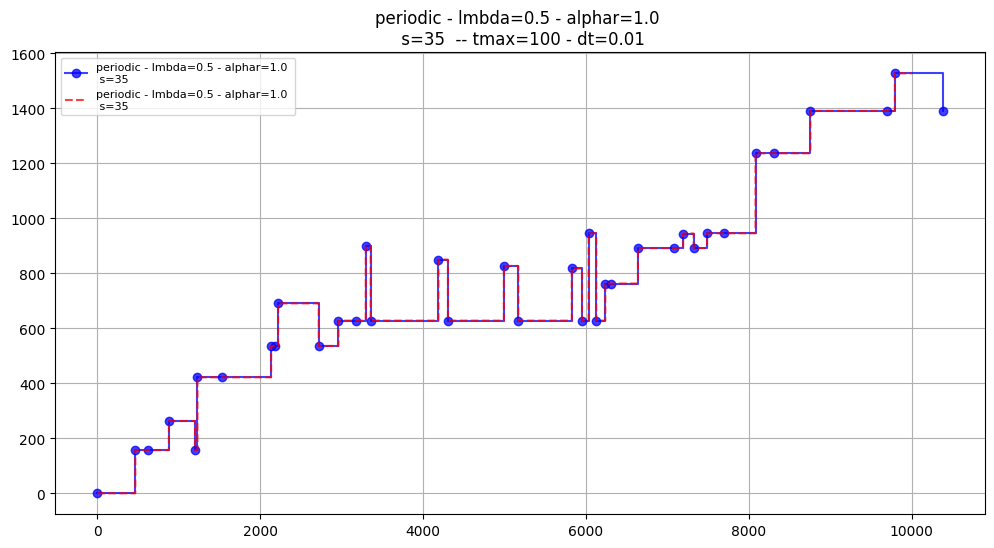

--------------------------------------------------------------------------------------------------------------------------
v_mean = 4.76
v_mean_th = 5.00
v_mean_th_eff = 5.00


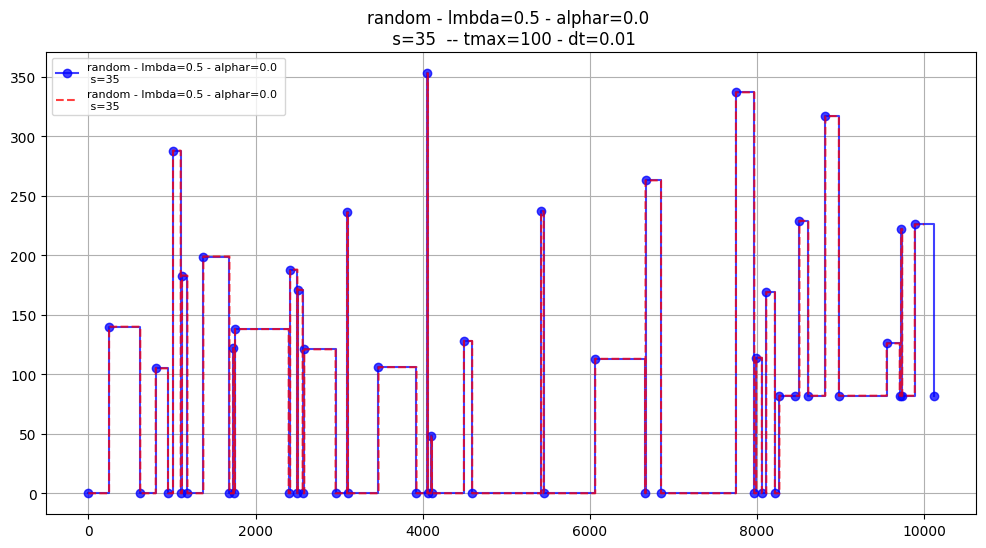

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.31
v_mean_th = 5.00
v_mean_th_eff = 5.00


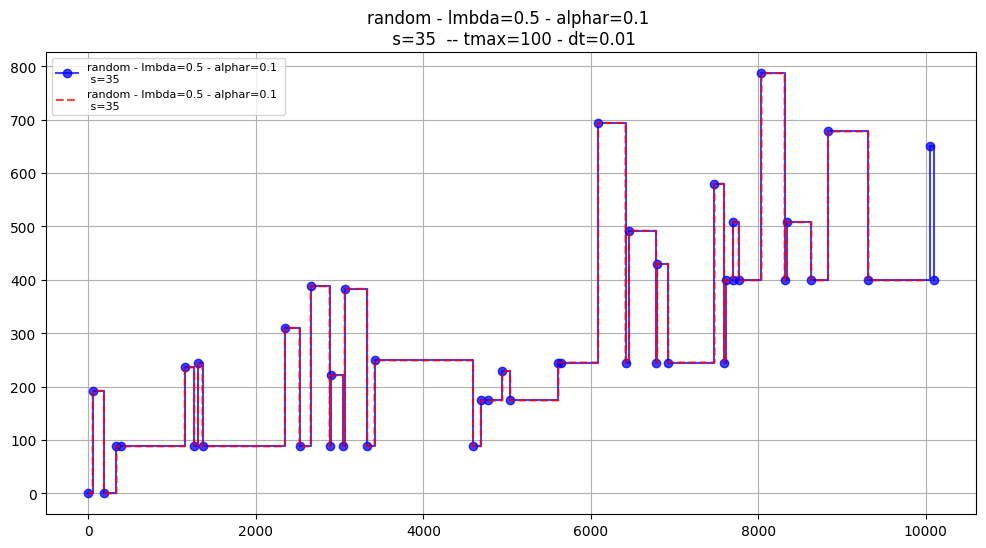

--------------------------------------------------------------------------------------------------------------------------
v_mean = 7.30
v_mean_th = 5.00
v_mean_th_eff = 5.00


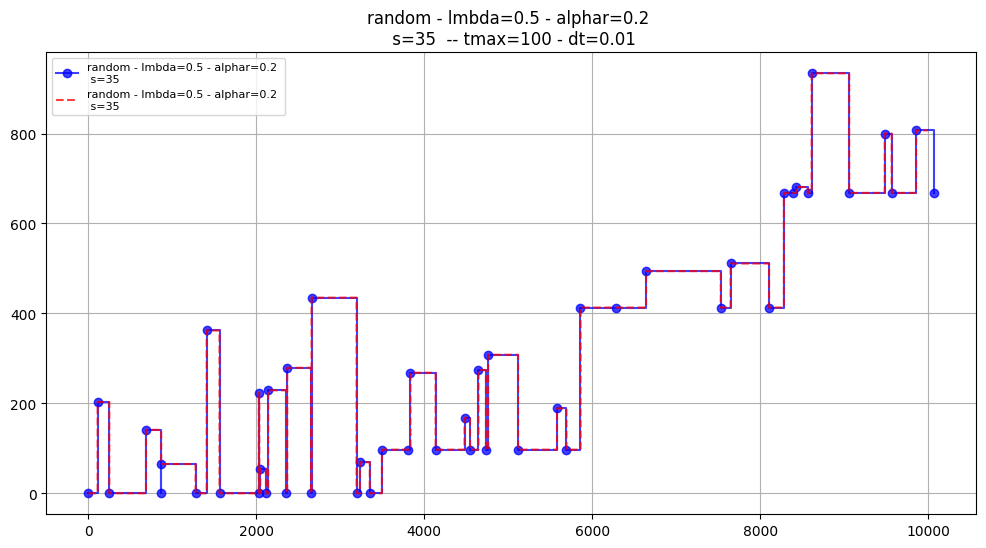

--------------------------------------------------------------------------------------------------------------------------
v_mean = 7.94
v_mean_th = 5.00
v_mean_th_eff = 5.00


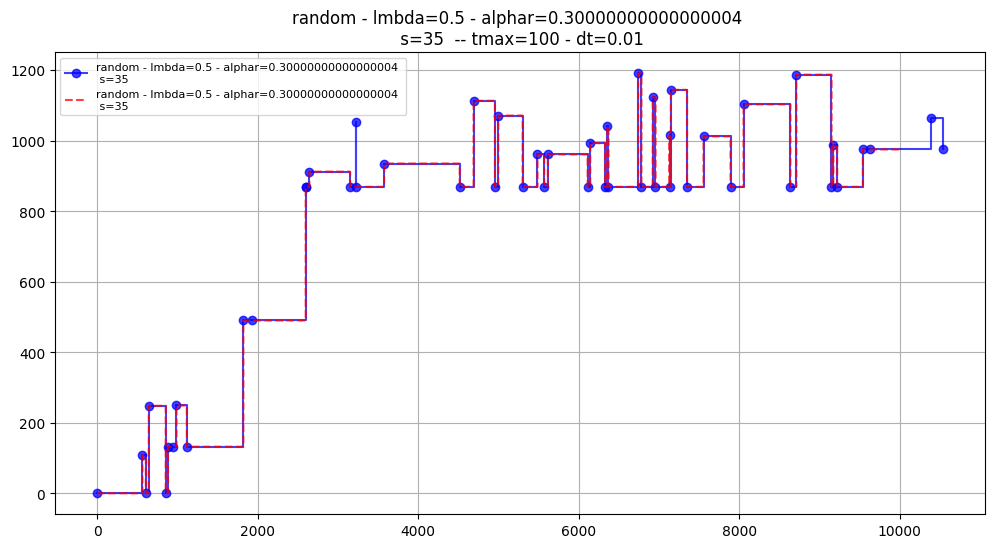

--------------------------------------------------------------------------------------------------------------------------
v_mean = 8.92
v_mean_th = 5.00
v_mean_th_eff = 5.00


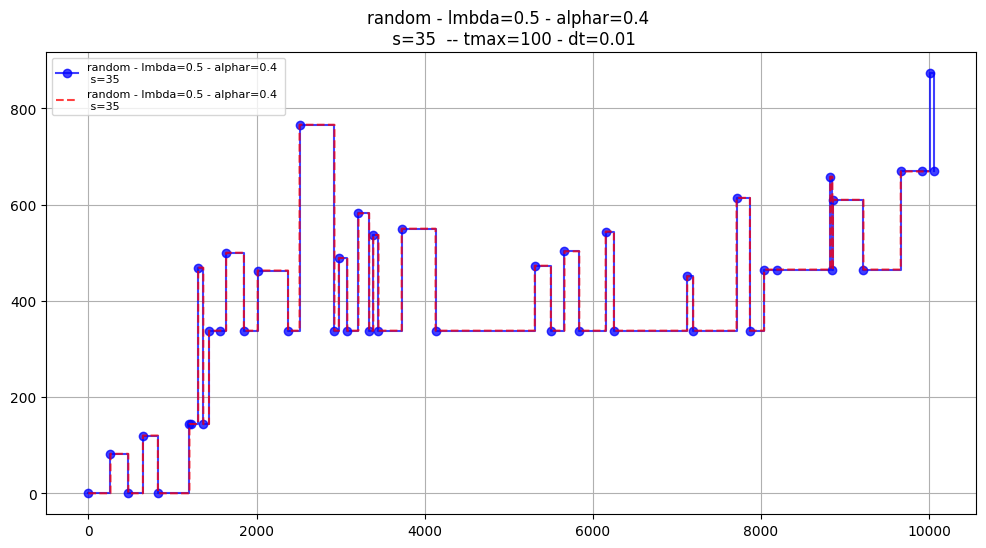

--------------------------------------------------------------------------------------------------------------------------
v_mean = 8.99
v_mean_th = 5.00
v_mean_th_eff = 5.00


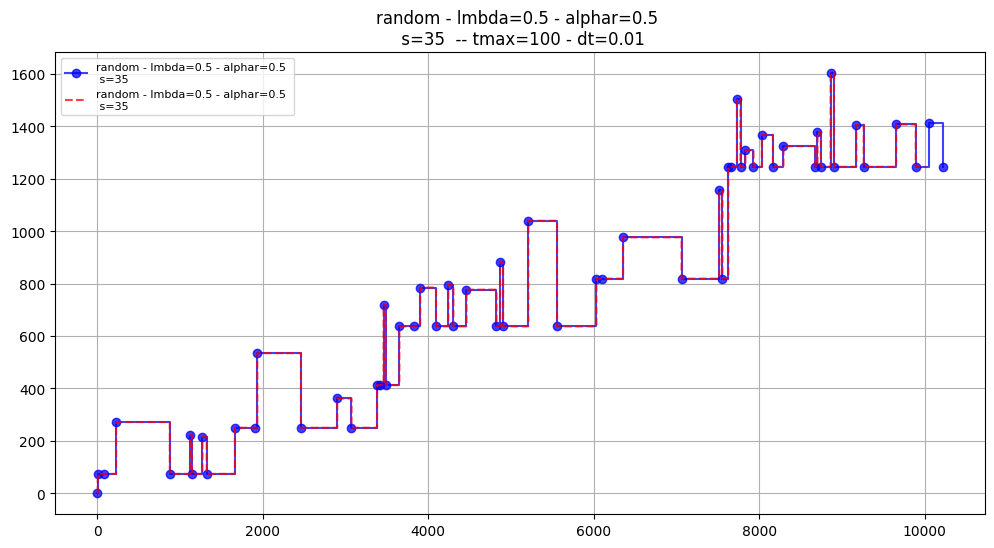

--------------------------------------------------------------------------------------------------------------------------
v_mean = 10.68
v_mean_th = 5.00
v_mean_th_eff = 5.00


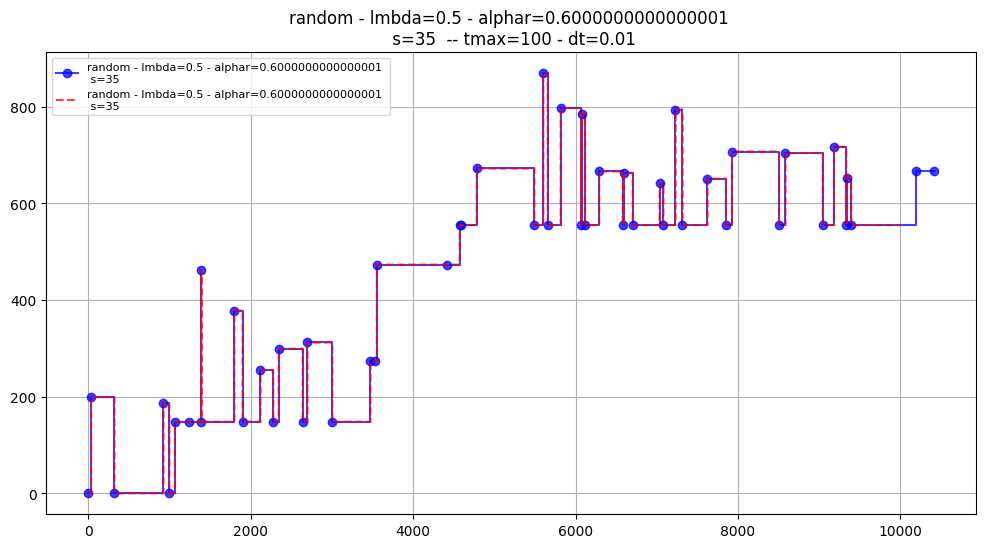

--------------------------------------------------------------------------------------------------------------------------
v_mean = 10.96
v_mean_th = 5.00
v_mean_th_eff = 5.00


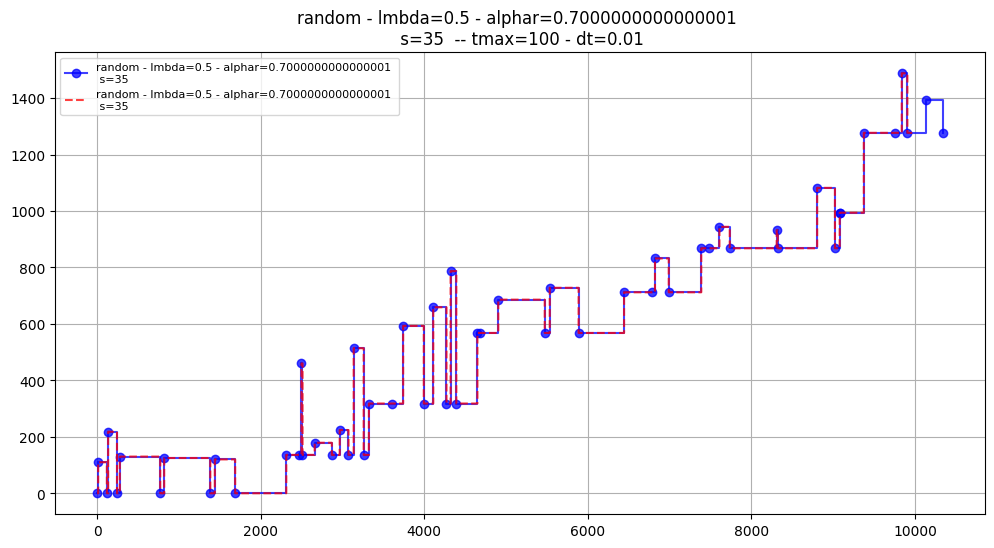

--------------------------------------------------------------------------------------------------------------------------
v_mean = 13.33
v_mean_th = 5.00
v_mean_th_eff = 5.00


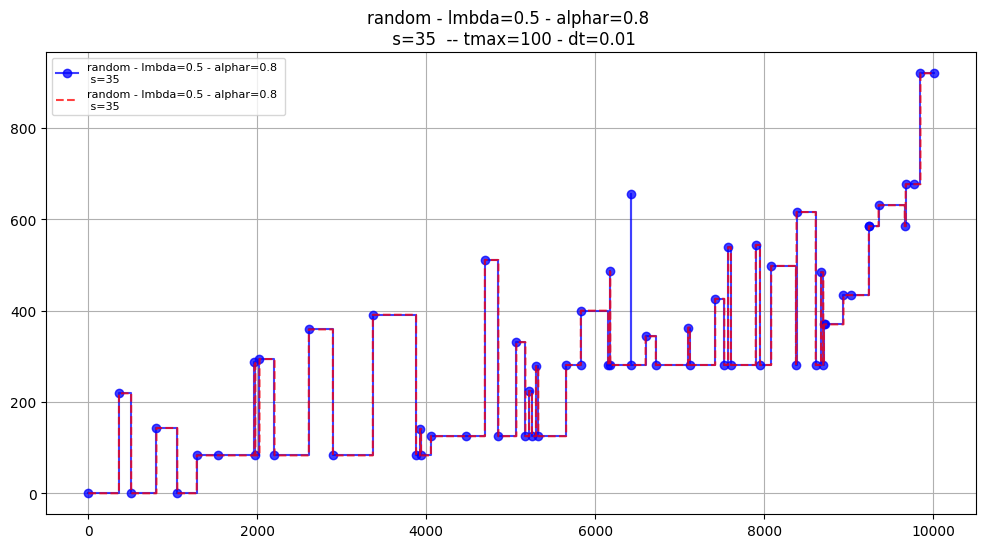

--------------------------------------------------------------------------------------------------------------------------
v_mean = 13.31
v_mean_th = 5.00
v_mean_th_eff = 5.00


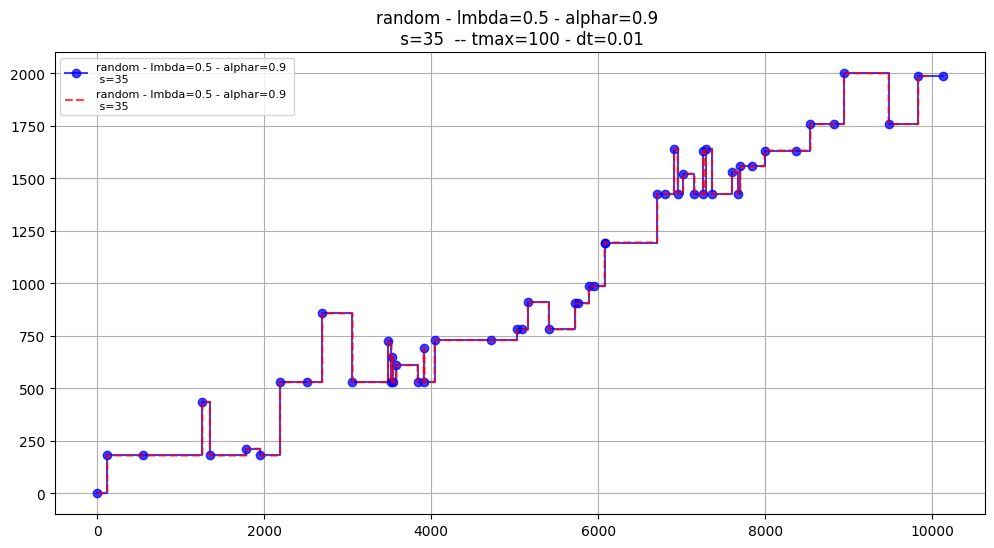

--------------------------------------------------------------------------------------------------------------------------
v_mean = 15.23
v_mean_th = 5.00
v_mean_th_eff = 5.00


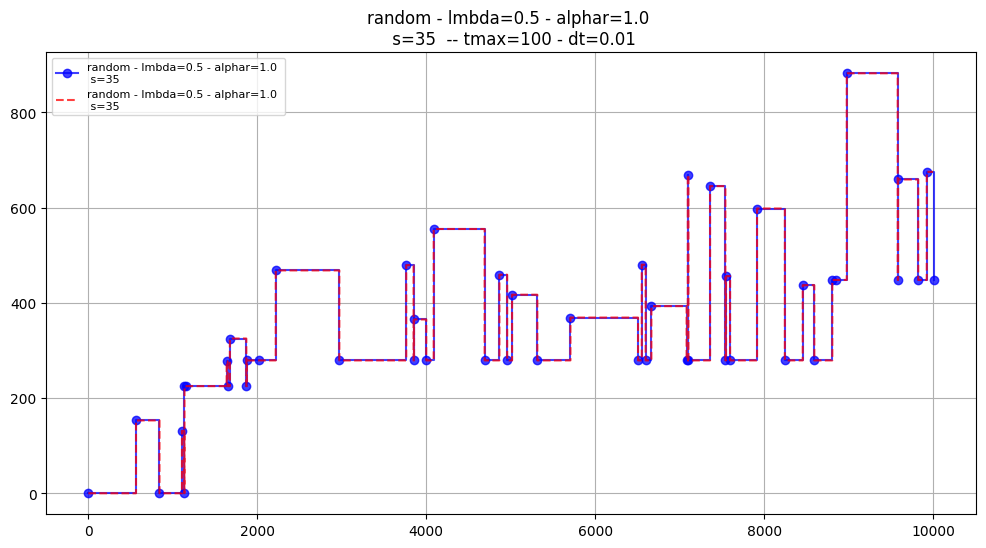

--------------------------------------------------------------------------------------------------------------------------


In [20]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-15__PC/nucleo__shorttest_errors")
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-18__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
n_rows = df_all.height
cmap = plt.cm.plasma
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    plt.figure(figsize=(12,6))
    
    results     = row["results"]
    t_matrix    = row["t_matrix"]
    x_matrix    = row["x_matrix"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    dt          = row["dt"]
    tmax        = row["tmax"]
    title       = f"{landscape} - lmbda={lmbda} - alphar={alphar} \n s={s} "
    
    
    t_matrix = np.array(t_matrix, dtype=float)
    x_matrix = np.array(x_matrix, dtype=float)
    # results  = np.array(results, dtype=int)
    
    v_mean = row["v_mean"]
    v_mean_th = row["v_mean_th"]
    v_mean_th_eff = row["v_mean_th_eff"]
    
    print(f"v_mean = {v_mean:.2f}")
    print(f"v_mean_th = {v_mean_th:.2f}")
    print(f"v_mean_th_eff = {v_mean_th_eff:.2f}")

    rank = 2
    
    plt.title(f"{title} -- tmax={tmax} - dt={dt}")
    plt.plot(t_matrix[rank] / dt, x_matrix[rank], color="b", alpha=0.75,
             label=title, drawstyle="steps-post", marker="o")
    plt.plot(np.arange(len(results[rank])), results[rank], color="r", alpha=0.75,
             label=title, drawstyle="steps-post", ls="--")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()
    # print(f"{results[rank]}")
    # print(f"{t_matrix[rank]}")
    # print(f"{x_matrix[rank]}")
    print("--------------------------------------------------------------------------------------------------------------------------")

In [140]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-08__PC/nucleo__perftest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["FORMALISM", "landscape", "l", "alphar", "kB", "kU"]) # Valeurs mappées.
)


# K column
df_all = df_all.with_columns(
    (pl.col("kB") / (pl.col("kB") + pl.col("kU"))).alias("K")
)
# a b columns



# Prints
print(df_all)
print("Keys:", df_all.columns)


# Common values
mu      = df_all["mu"][0]
theta   = df_all["theta"][0]
dt      = df_all["dt"][0]
tmax    = df_all["tmax"][0]
nt      = df_all["nt"][0]


# Checking parameters
landscape = df_all["landscape"].to_numpy()
l = df_all["l"].to_numpy()
kB = df_all["kB"].to_numpy()
kU = df_all["kU"].to_numpy()

print("landscape :", np.unique(landscape))
print("l :", np.unique(l))
print("kB :", np.unique(kB))
print("kU :", np.unique(kU))
print("alphar :", np.unique(alphar))

shape: (11_025, 38)
┌───────────┬─────────────┬─────┬─────┬───┬─────────────┬──────────┬───────┬──────────┐
│ FORMALISM ┆ landscape   ┆ s   ┆ l   ┆ … ┆ vi_mean     ┆ vi_med   ┆ vi_mp ┆ K        │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---         ┆ ---      ┆ ---   ┆ ---      │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64         ┆ f64      ┆ f64   ┆ f64      │
╞═══════════╪═════════════╪═════╪═════╪═══╪═════════════╪══════════╪═══════╪══════════╡
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 35.522548   ┆ 0.639479 ┆ 0.5   ┆ 0.5      │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 2881.808412 ┆ 1.112216 ┆ 0.5   ┆ 0.25     │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ -41.780509  ┆ 0.90424  ┆ 0.5   ┆ 0.166667 │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 87.741915   ┆ 1.281098 ┆ 0.5   ┆ 0.125    │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ -147.158663 ┆ 1.211194 ┆ 0.5   ┆ 0.1      │
│ …         ┆ …           ┆ …   ┆ …   ┆ … ┆ …           ┆ …        ┆ …     ┆ …        │
│ 3         

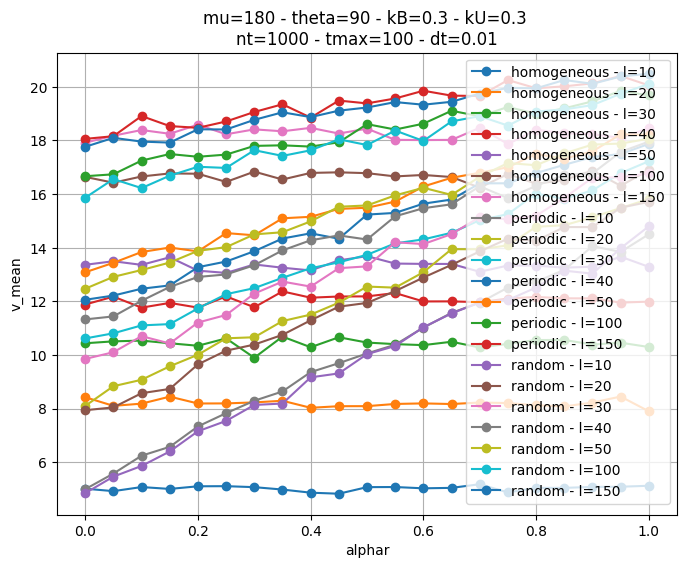

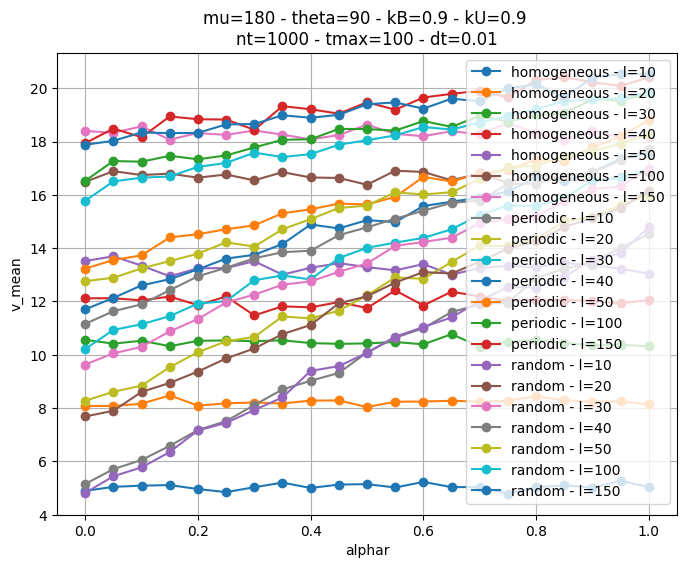

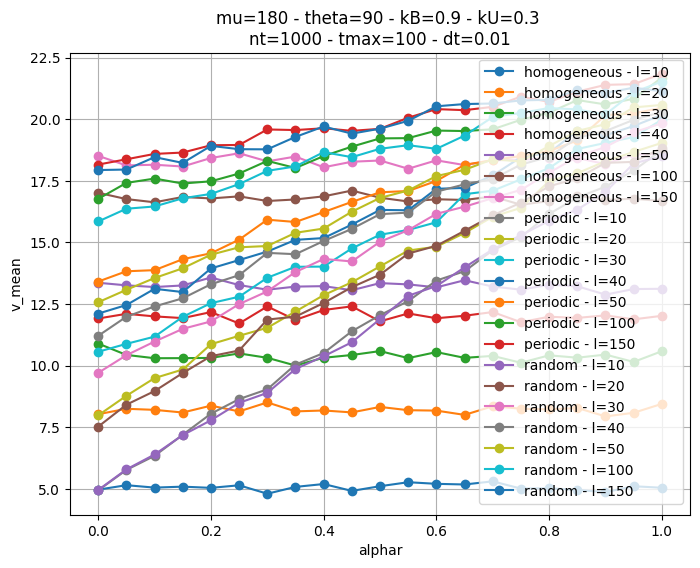

In [113]:
# Verification

from itertools import product


landscapes  = np.unique(df_all["landscape"].to_numpy())
ls          = np.unique(df_all["l"].to_numpy())
alphars     = np.unique(df_all["alphar"].to_numpy())
kBs         = np.unique(df_all["kB"].to_numpy())
kUs         = np.unique(df_all["kU"].to_numpy())

kB1 = kU1 = 0.3

title = f"mu={mu} - theta={theta} - kB={kB1} - kU={kU1} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB1)) & 
        (pl.col("kU").is_close(kU1))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)

plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()




kB2 = kU2 = 0.90

title = f"mu={mu} - theta={theta} - kB={kB2} - kU={kU2} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB2)) & 
        (pl.col("kU").is_close(kU2))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)


plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()



kB3 = 0.90
kU3 = 0.30

title = f"mu={mu} - theta={theta} - kB={kB3} - kU={kU3} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB3)) & 
        (pl.col("kU").is_close(kU3))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)


plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

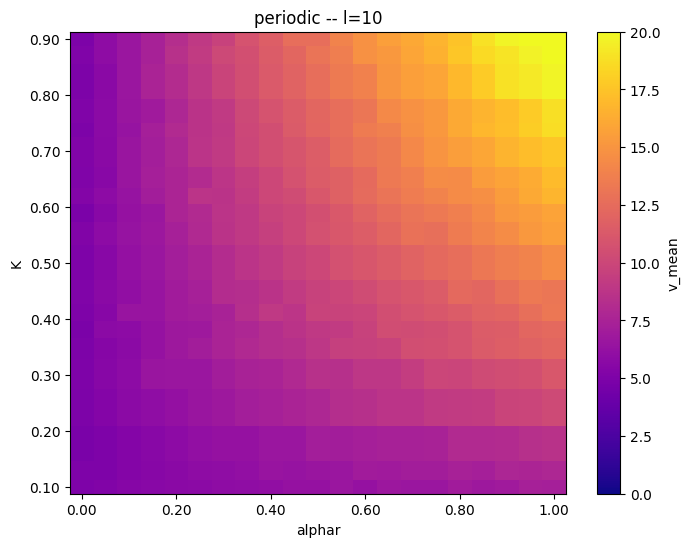

In [ ]:
# Heatmaps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker


# Choice
landscape = "periodic"
l = 10
vmin, vmax = 0, 20


# Data
df_heat = df_all.filter(
    (pl.col("landscape") == landscape) & (pl.col("l") == l)
).sort(["alphar", "K"])
# To 2D
df_pd = df_heat.to_pandas()
X_unique = np.sort(df_heat["alphar"].unique())
Y_unique = np.sort(df_heat["K"].unique())
X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)
Z2D = df_pd.pivot_table(values="v_mean", index="K", columns="alphar", aggfunc="mean").values


# Figure
plt.figure(figsize=(8,6))
plt.title(f"{landscape} -- l={l}")
plt.pcolormesh(X_grid, Y_grid, Z2D, cmap="plasma", vmin=vmin, vmax=vmax, shading='auto')
plt.xlabel("alphar")
plt.ylabel("K")
plt.colorbar(label="v_mean")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.show()


def plot_single_heatmap(df: pl.DataFrame, landscape: str, l: int):
    # Data
    df_heat = df.filter(
        (pl.col("landscape") == landscape) & (pl.col("l") == l)
    ).sort(["alphar", "K"])
    # To 2D
    df_pd = df_heat.to_pandas()
    X_unique = np.sort(df_heat["alphar"].unique())
    Y_unique = np.sort(df_heat["K"].unique())
    X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)
    Z2D = df_pd.pivot_table(values="v_mean", index="K", columns="alphar", aggfunc="mean").values


    # Figure
    plt.figure(figsize=(8,6))
    plt.title(f"{landscape} -- l={l}")
    plt.pcolormesh(X_grid, Y_grid, Z2D, cmap="plasma", vmin=vmin, vmax=vmax, shading='auto')
    plt.xlabel("alphar")
    plt.ylabel("K")
    plt.colorbar(label="v_mean")
    plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.show()

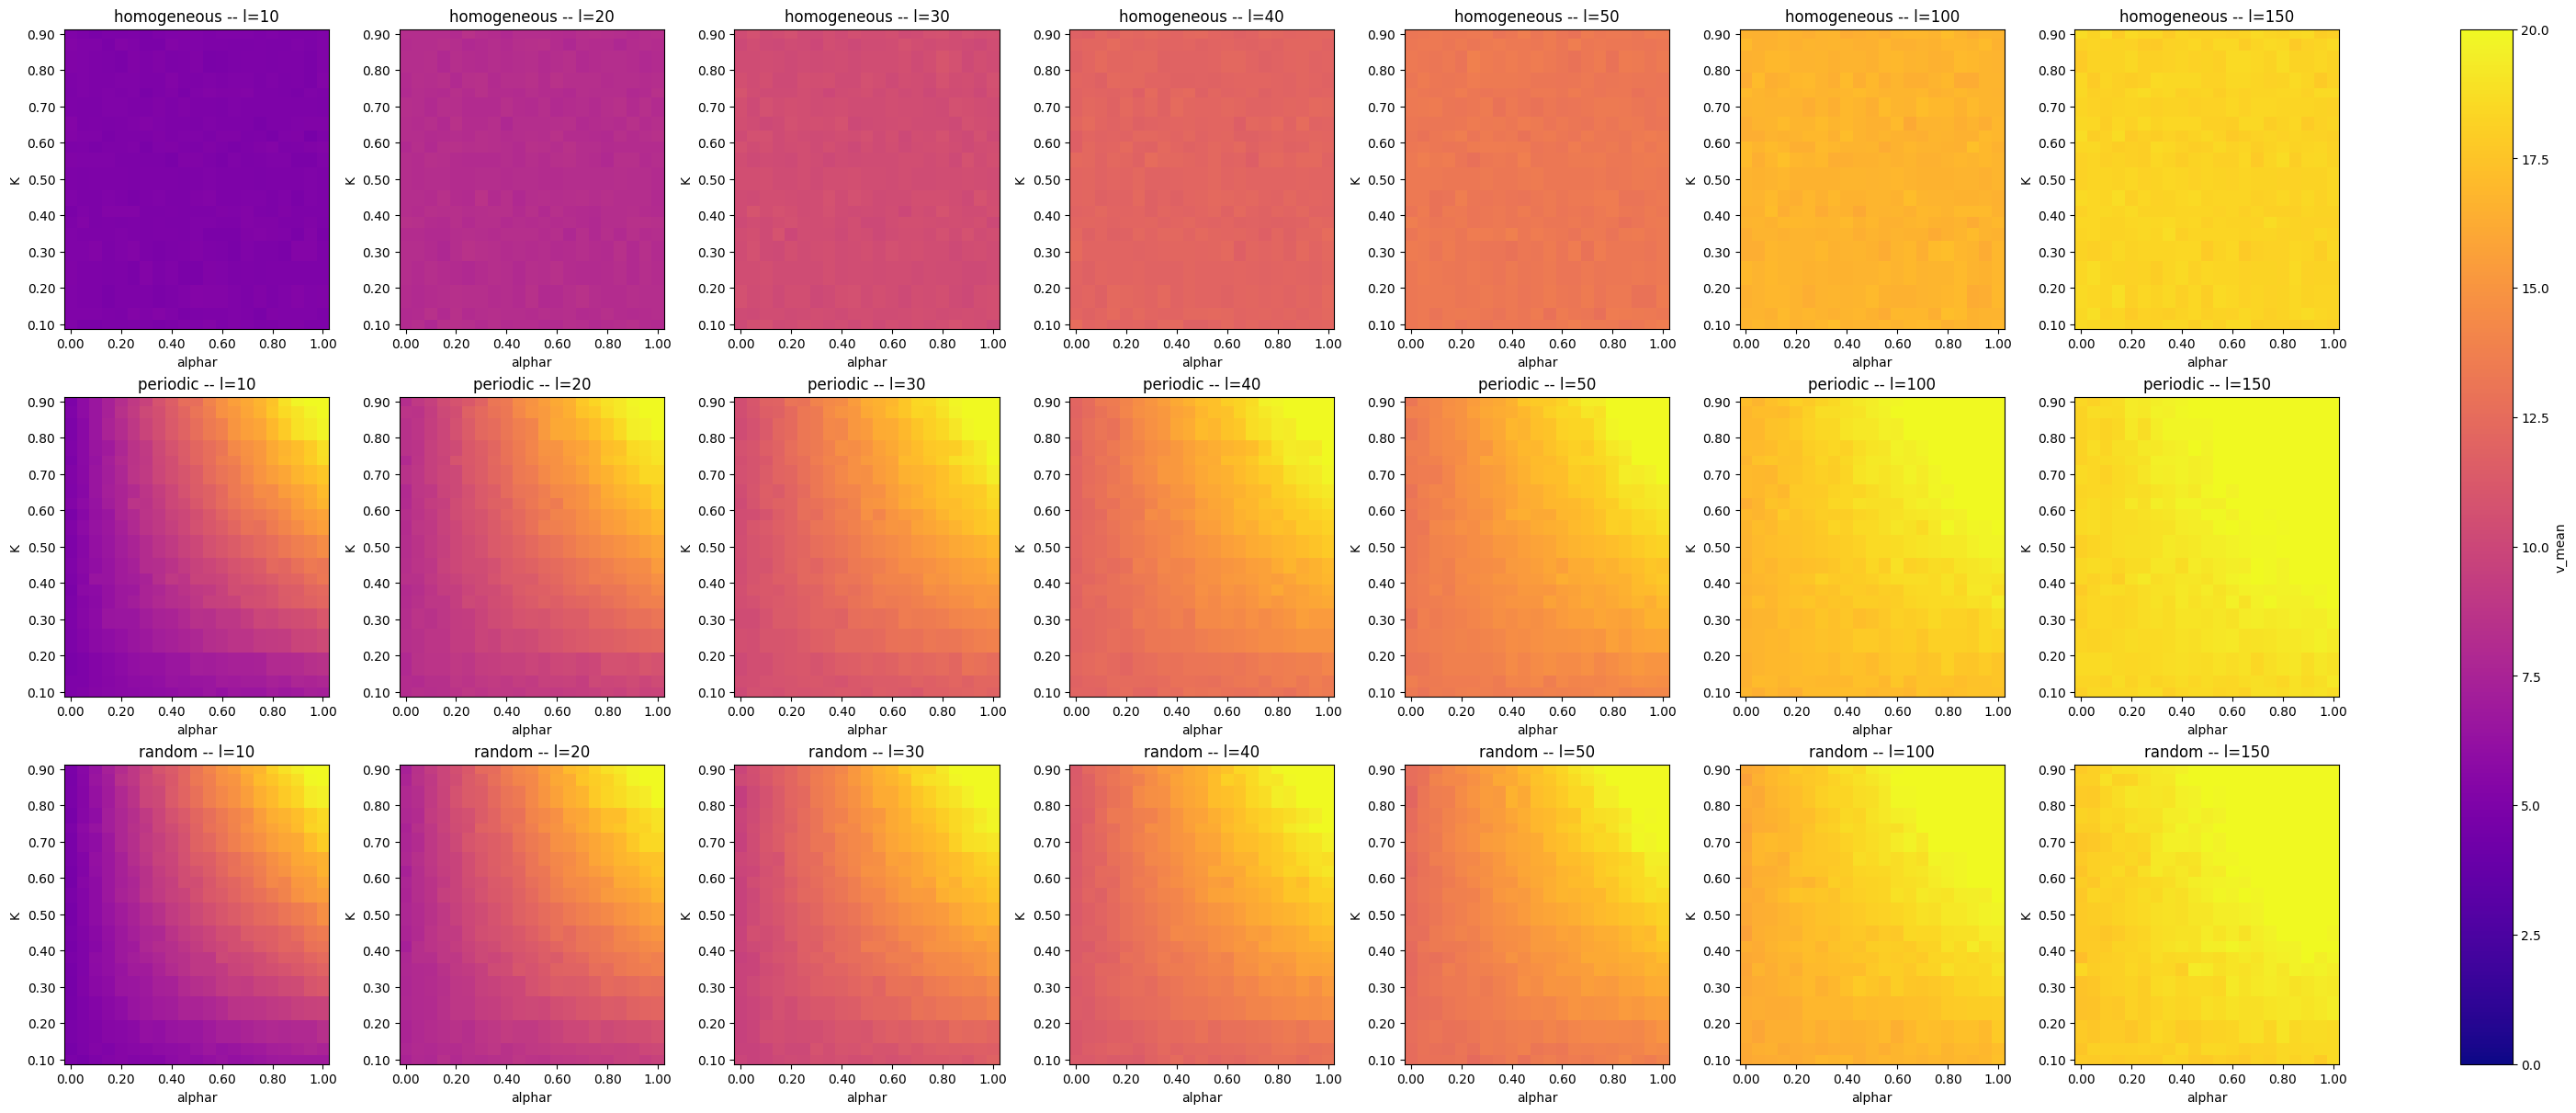

In [191]:
from itertools import product
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd


def plot_single_heatmap_v_mean(df: pl.DataFrame, landscape: str, l: int, ax, vmin=0, vmax=20):
    # DataFrame
    df_heat = df.filter(
        (pl.col("landscape") == landscape) & (pl.col("l") == l)
    ).sort(["alphar", "K"])
    
    # Conversion
    df_pd = df_heat.to_pandas()
    X_unique = np.sort(df_heat["alphar"].unique())
    Y_unique = np.sort(df_heat["K"].unique())
    X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)
    Z2D = df_pd.pivot_table(values="v_mean", index="K", columns="alphar", aggfunc="mean").values

    # Subplot
    c = ax.pcolormesh(X_grid, Y_grid, Z2D, cmap="plasma", vmin=vmin, vmax=vmax, shading='auto')
    ax.set_title(f"{landscape} -- l={l}")
    ax.set_xlabel("alphar")
    ax.set_ylabel("K")
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    
    return c


n_rows = len(landscapes)
n_cols = len(ls)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), constrained_layout=True)
axes_flat = axes.flatten() if axes.ndim > 1 else axes

for ax, (landscape, l) in zip(axes_flat, product(landscapes, ls)):
    c = plot_single_heatmap_v_mean(df_all, landscape, l, ax)
fig.colorbar(c, ax=axes_flat, orientation='vertical', label='v_mean')
plt.show()

In [ ]:
from itertools import product
import polars as pl
import numpy as np

df_all = df_all.with_columns([
    pl.lit(None).alias("a"),
    pl.lit(None).alias("b")
])

landscapes = np.unique(df_all["landscape"].to_numpy())
ls         = np.unique(df_all["l"].to_numpy())

for landscape, l in product(landscapes, ls):
    df_zero = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("alphar").is_close(0))
    )
    vnr = np.mean(df_zero["v_mean"].to_numpy())
    
    mask = (pl.col("landscape") == landscape) & (pl.col("l") == l)
    
    df_all = df_all.with_columns([
        pl.when(mask)
          .then((pl.col("v_mean") - vnr) / pl.col("alphar"))
          .otherwise(pl.col("a"))
          .alias("a"),
        
        pl.when(mask)
          .then(pl.lit(vnr))
          .otherwise(pl.col("b"))
          .alias("b")
    ])

df_all = df_all.with_columns(
    pl.when(pl.col("a").is_infinite())
      .then(None)
      .otherwise(pl.col("a"))
      .alias("a")
)

print(df_all)

shape: (11_025, 40)
┌───────────┬─────────────┬─────┬─────┬───┬───────┬──────────┬──────────┬───────────┐
│ FORMALISM ┆ landscape   ┆ s   ┆ l   ┆ … ┆ vi_mp ┆ K        ┆ a        ┆ b         │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---   ┆ ---      ┆ ---      ┆ ---       │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64   ┆ f64      ┆ f64      ┆ f64       │
╞═══════════╪═════════════╪═════╪═════╪═══╪═══════╪══════════╪══════════╪═══════════╡
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5   ┆ 0.5      ┆ null     ┆ 5.105805  │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5   ┆ 0.25     ┆ null     ┆ 5.105805  │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5   ┆ 0.166667 ┆ null     ┆ 5.105805  │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5   ┆ 0.125    ┆ null     ┆ 5.105805  │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5   ┆ 0.1      ┆ null     ┆ 5.105805  │
│ …         ┆ …           ┆ …   ┆ …   ┆ … ┆ …     ┆ …        ┆ …        ┆ …         │
│ 3         ┆ random      ┆ 35  ┆ 

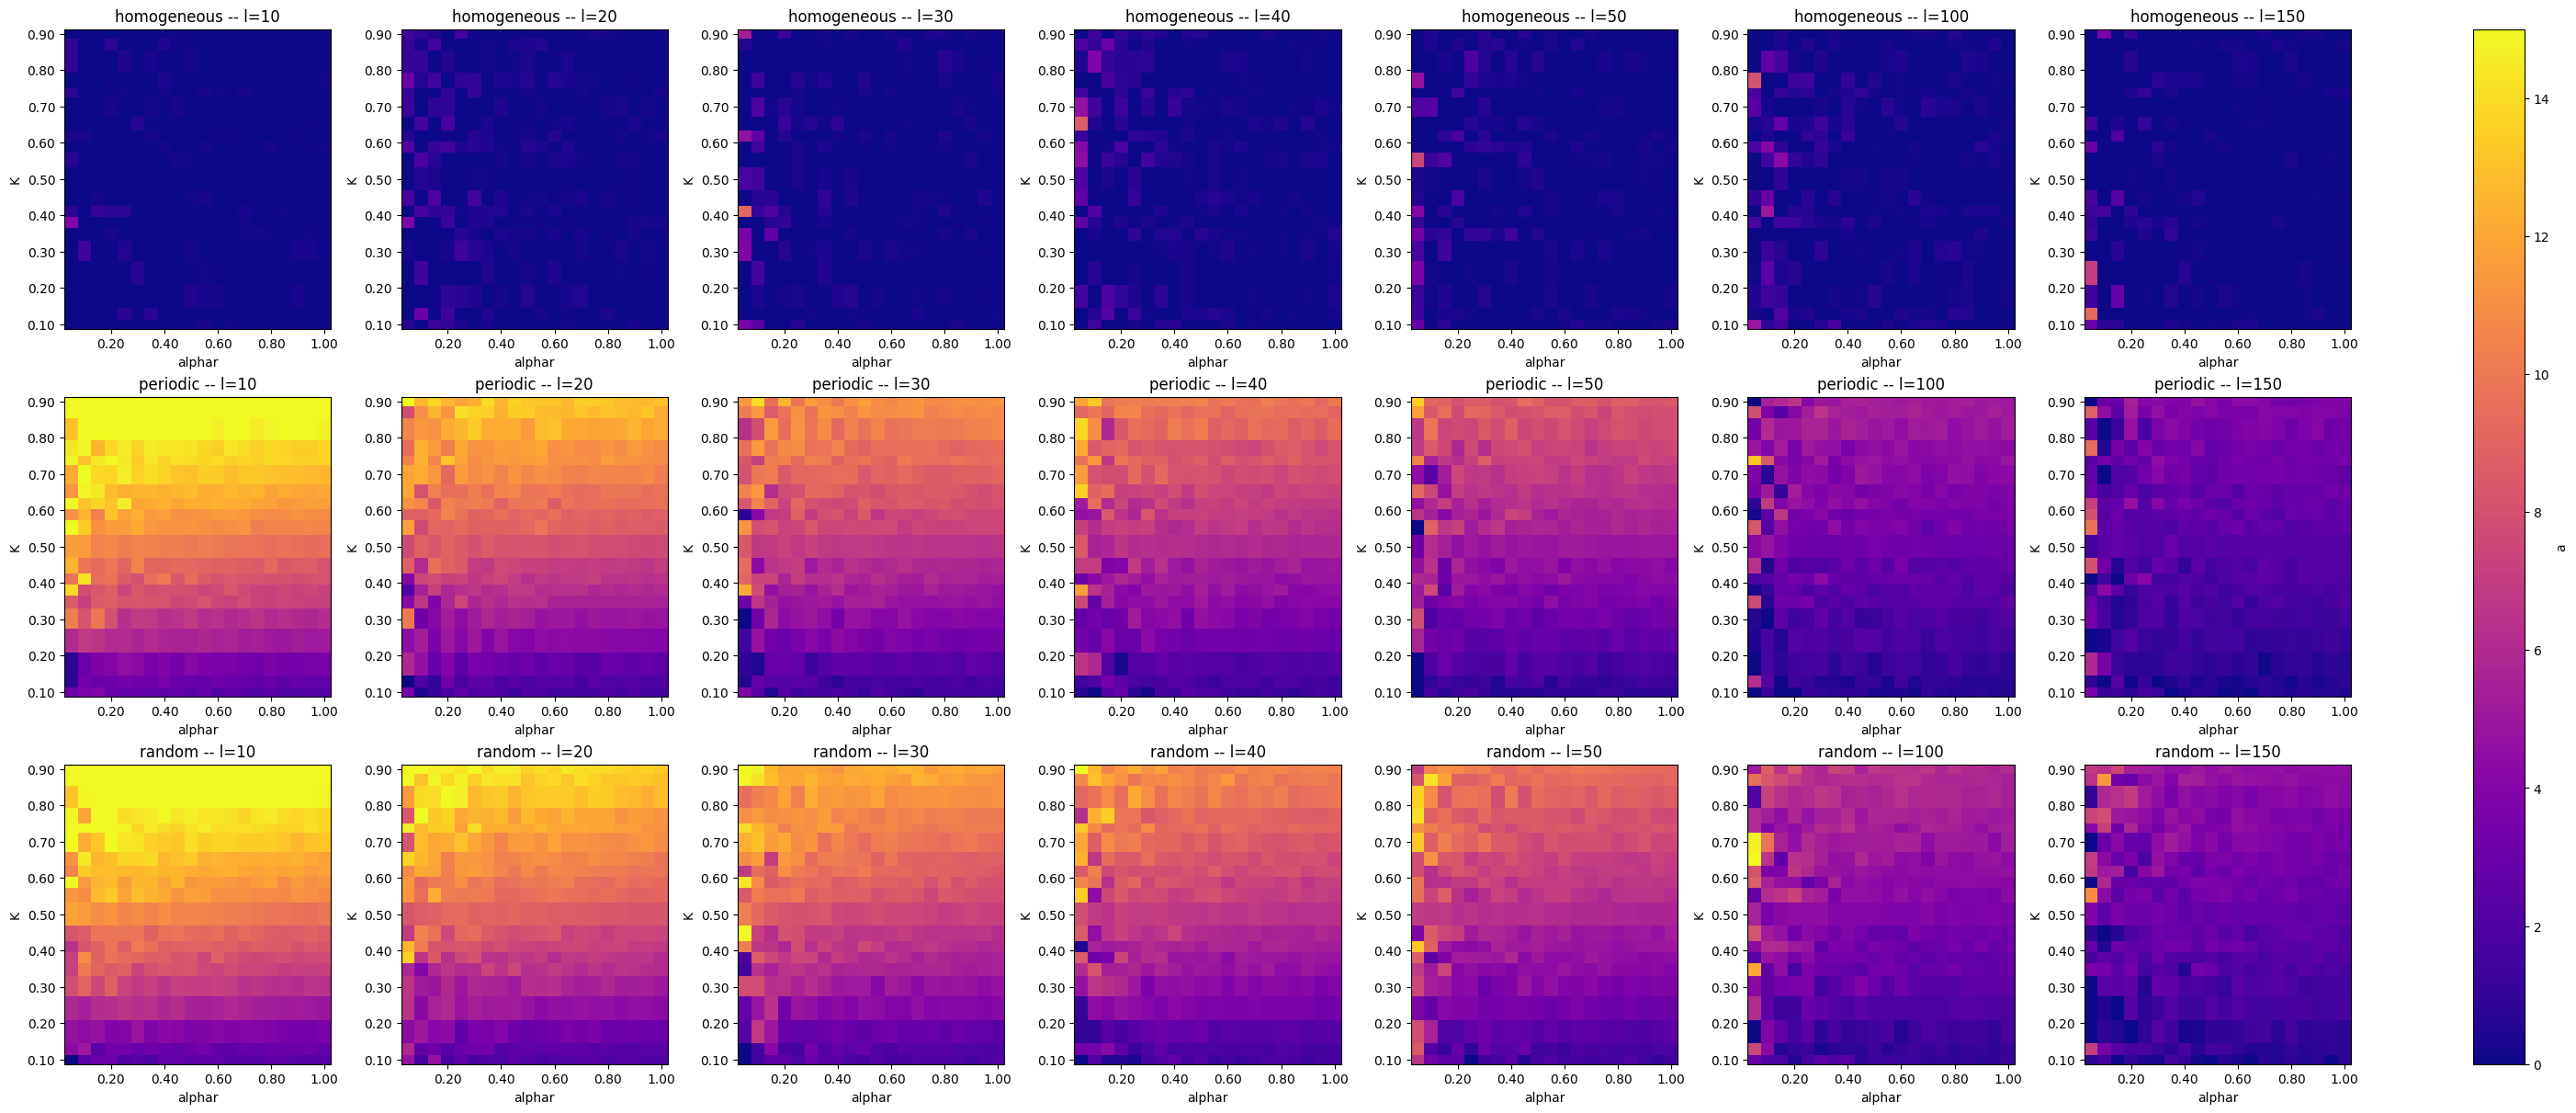

In [194]:
from itertools import product
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd


def plot_single_heatmap_a(df: pl.DataFrame, landscape: str, l: int, ax, vmin=0, vmax=15):
    # DataFrame
    df_heat = df.filter(
        (pl.col("landscape") == landscape) & (pl.col("l") == l)
    ).sort(["alphar", "K"])
    
    # Conversion
    df_pd = df_heat.to_pandas()
    X_unique = np.sort(df_heat["alphar"].unique())[1:]
    Y_unique = np.sort(df_heat["K"].unique())
    X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)
    Z2D = df_pd.pivot_table(values="a", index="K", columns="alphar", aggfunc="mean").values

    # Subplot
    c = ax.pcolormesh(X_grid, Y_grid, Z2D, cmap="plasma", vmin=vmin, vmax=vmax, shading='auto')
    ax.set_title(f"{landscape} -- l={l}")
    ax.set_xlabel("alphar")
    ax.set_ylabel("K")
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    
    return c


n_rows = len(landscapes)
n_cols = len(ls)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), constrained_layout=True)
axes_flat = axes.flatten() if axes.ndim > 1 else axes

for ax, (landscape, l) in zip(axes_flat, product(landscapes, ls)):
    c = plot_single_heatmap_a(df_all, landscape, l, ax)
fig.colorbar(c, ax=axes_flat, orientation='vertical', label='a')
plt.show()

# .